# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [138]:
from google.colab import drive
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [163]:
# Menghubungkan colab dengan google drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/submission_dicoding/coffee_sales.csv'

df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [164]:
# 1. Memahami Struktur Data
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah Data Unik Tiap Kolom:")
print(df.nunique())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB
None

Statistik Deskriptif:
             money
count  3263.000000
mean     31.798682
std       4.939635
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000

Jumlah Data Unik Tiap Kolom:
date            355
datetime       3263
cash_type         2
card           1247
money            20
coffee_name       8
dtype: int64


In [165]:
# 2. Menangani Data yang Hilang
print("\nJumlah Data Hilang Tiap Kolom:")
print(df.isnull().sum())


Jumlah Data Hilang Tiap Kolom:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [166]:
#Cek Nilai Duplikat
df.duplicated().sum()

np.int64(0)

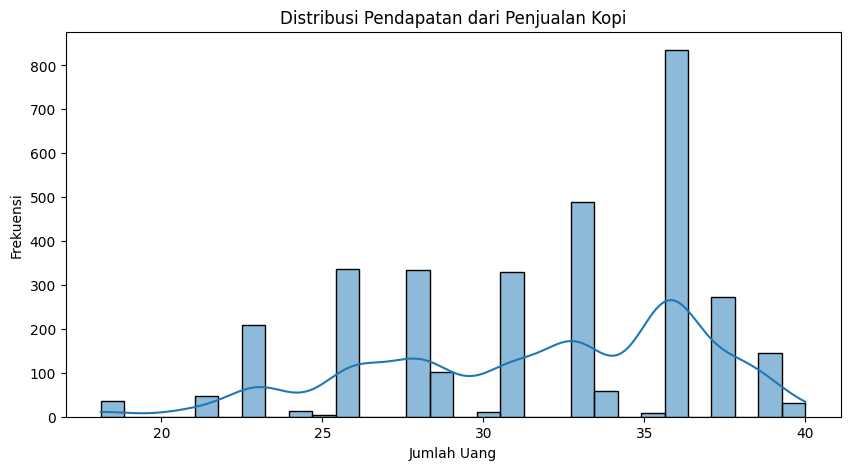

In [167]:
# 3. Analisis Distribusi Data
plt.figure(figsize=(10, 5))
sns.histplot(df['money'], bins=30, kde=True)
plt.title("Distribusi Pendapatan dari Penjualan Kopi")
plt.xlabel("Jumlah Uang")
plt.ylabel("Frekuensi")
plt.show()


<ipython-input-168-9b3de44f0276>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cash_type', palette='Set2')


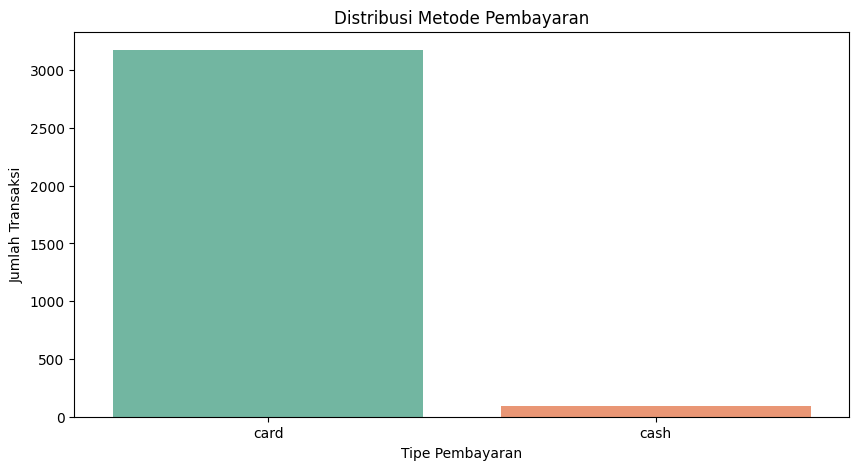

<ipython-input-168-9b3de44f0276>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index[:10], palette='Set1')


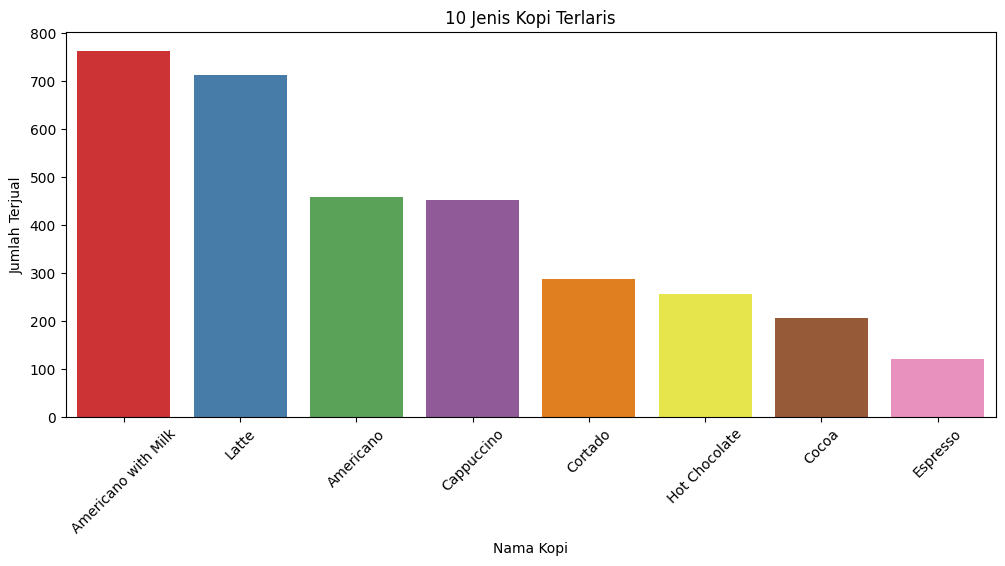

In [168]:
# 4. Visualisasi Data Kategorikal
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cash_type', palette='Set2')
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Tipe Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index[:10], palette='Set1')
plt.xticks(rotation=45)
plt.title("10 Jenis Kopi Terlaris")
plt.xlabel("Nama Kopi")
plt.ylabel("Jumlah Terjual")
plt.show()

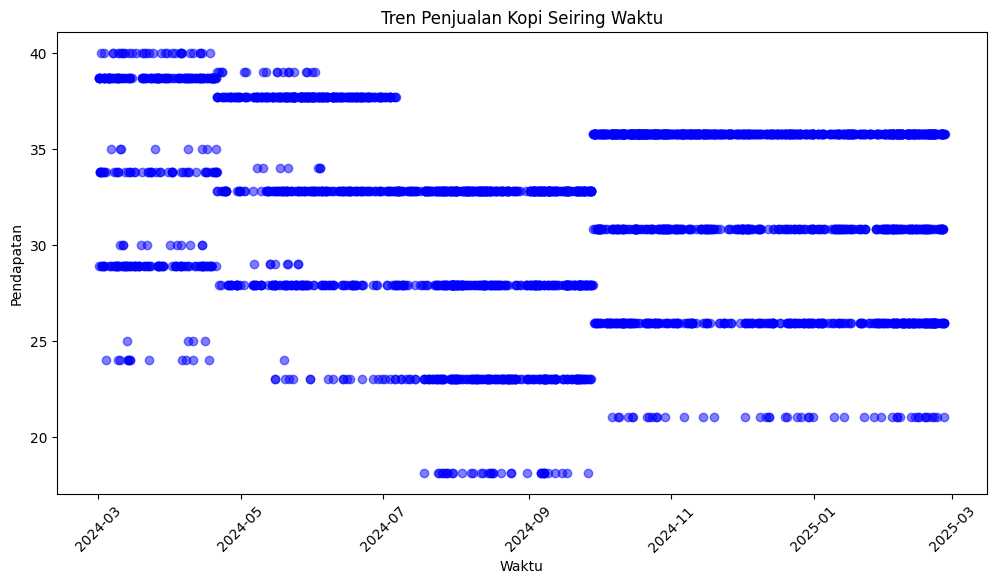

In [169]:
# 5. Scatter Plot Money vs Datetime
plt.figure(figsize=(12, 6))
plt.scatter(pd.to_datetime(df['datetime']), df['money'], alpha=0.5, color='b')
plt.title("Tren Penjualan Kopi Seiring Waktu")
plt.xlabel("Waktu")
plt.ylabel("Pendapatan")
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [170]:
# 1. Konversi Format Data
# Mengubah kolom date dan datetime menjadi format datetime
try:
    df['date'] = pd.to_datetime(df['date'])
    df['datetime'] = pd.to_datetime(df['datetime'])
except Exception as e:
    print("Error konversi datetime:", e)

In [171]:
#2. Menghapus spasi yang tidak terlihat dan mengubah semua ke huruf kecil
df['coffee_name'] = df['coffee_name'].str.strip().str.lower()
df['cash_type'] = df['cash_type'].str.strip().str.lower()
df['card'] = df['card'].str.strip().str.lower()

# Memeriksa kembali jumlah kategori setelah pembersihan
print(df['coffee_name'].nunique())  # Harus menunjukkan kategori yang benar
print(df['cash_type'].nunique())
print(df['card'].nunique())


8
2
1247


In [172]:
#3. Menampilkan nilai unik dari setiap kolom
print(df['coffee_name'].unique())  # Untuk melihat kategori dalam coffee_name
print(df['cash_type'].unique())    # Untuk melihat kategori dalam cash_type
print(df['card'].unique())         # Untuk melihat kategori dalam card


['latte' 'hot chocolate' 'americano' 'americano with milk' 'cocoa'
 'cortado' 'espresso' 'cappuccino']
['card' 'cash']
['anon-0000-0000-0001' 'anon-0000-0000-0002' 'anon-0000-0000-0003' ...
 'anon-0000-0000-1245' 'anon-0000-0000-1246' 'anon-0000-0000-1247']


In [173]:
#4. Ganti missing values dengan mode untuk setiap kolom
df['card'] = df['card'].fillna(df['card'].mode()[0])

In [174]:
# Pisahkan kolom kategorikal dan numerik
categorical_columns = ['card', 'coffee_name', 'cash_type']  # Gantilah sesuai nama kolom kategorikal di dataset kamu
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 5. Lakukan Encoding untuk Kolom Kategorikal
encoder_card = LabelEncoder()
df['card'] = encoder_card.fit_transform(df['card'])

encoder_coffee = LabelEncoder()
df['coffee_name'] = encoder_coffee.fit_transform(df['coffee_name'])

# Cek apakah kolom cash_type memiliki lebih dari satu kategori
if df['cash_type'].nunique() > 1:
    encoder_cash = LabelEncoder()
    df['cash_type'] = encoder_cash.fit_transform(df['cash_type'])
else:
    print("Kolom 'cash_type' hanya memiliki satu kategori, tidak perlu encoding.")

# 6. Normalisasi Data Numerik
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Tampilkan hasil encoding dan normalisasi
print(df.head())


        date                datetime  cash_type  card     money  coffee_name
0 2024-03-01 2024-03-01 10:15:50.520          0     0  1.397345            7
1 2024-03-01 2024-03-01 12:19:22.539          0     1  1.397345            6
2 2024-03-01 2024-03-01 12:20:18.089          0     1  1.397345            6
3 2024-03-01 2024-03-01 13:46:33.006          0     2 -0.586911            0
4 2024-03-01 2024-03-01 13:48:14.626          0     3  1.397345            7


In [175]:
#7. Melakukan Binning
df['year'] = df['date'].dt.year  # Ekstrak tahun dari date
unique_years = df['year'].unique()  # Ambil daftar tahun unik
unique_years.sort()  # Urutkan tahun
print("Tahun yang ada dalam dataset:", unique_years)
print("Jumlah tahun unik:", len(unique_years))


Tahun yang ada dalam dataset: [2024 2025]
Jumlah tahun unik: 2


In [176]:
# mengubah date ke format bulan
df['date'] = pd.to_datetime(df['date'])

# Ekstrak bulan dari kolom 'date'
df['month'] = df['date'].dt.month

# Tampilkan hasil ekstraksi bulan
print(df[['date', 'month']].head())

        date  month
0 2024-03-01      3
1 2024-03-01      3
2 2024-03-01      3
3 2024-03-01      3
4 2024-03-01      3


In [177]:
print(df.head())

        date                datetime  cash_type  card     money  coffee_name  \
0 2024-03-01 2024-03-01 10:15:50.520          0     0  1.397345            7   
1 2024-03-01 2024-03-01 12:19:22.539          0     1  1.397345            6   
2 2024-03-01 2024-03-01 12:20:18.089          0     1  1.397345            6   
3 2024-03-01 2024-03-01 13:46:33.006          0     2 -0.586911            0   
4 2024-03-01 2024-03-01 13:48:14.626          0     3  1.397345            7   

   year  month  
0  2024      3  
1  2024      3  
2  2024      3  
3  2024      3  
4  2024      3  


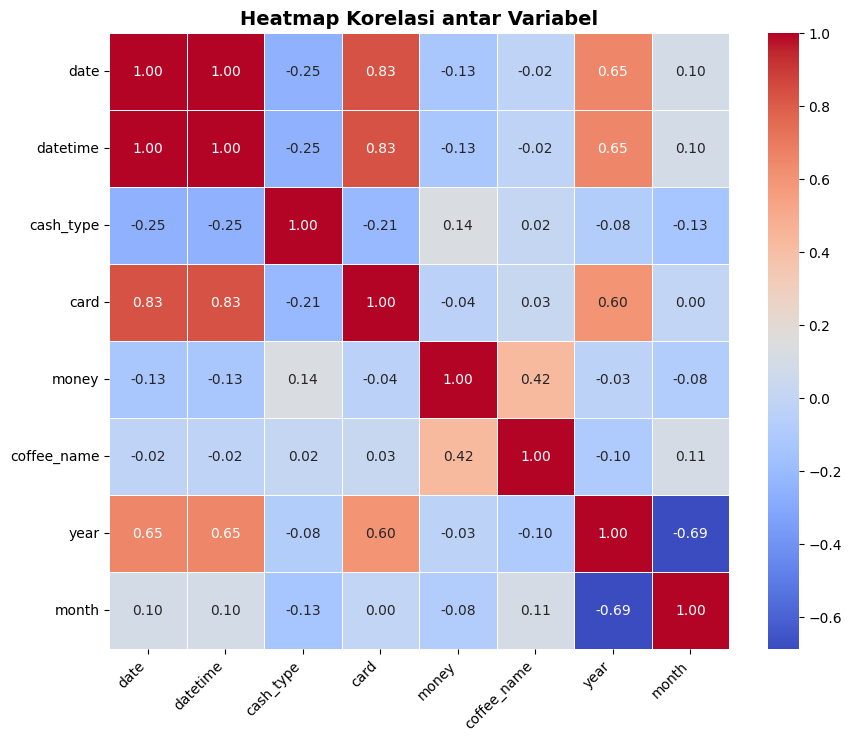

Interpretasi Korelasi:

Kolom 'date' memiliki korelasi kuat dengan:
datetime    0.999998
card        0.830161
year        0.654317
Name: date, dtype: float64

Kolom 'datetime' memiliki korelasi kuat dengan:
date    0.999998
card    0.830259
year    0.654321
Name: datetime, dtype: float64

Kolom 'card' memiliki korelasi kuat dengan:
date        0.830161
datetime    0.830259
year        0.602130
Name: card, dtype: float64

Kolom 'year' memiliki korelasi kuat dengan:
date        0.654317
datetime    0.654321
card        0.602130
month      -0.687480
Name: year, dtype: float64

Kolom 'month' memiliki korelasi kuat dengan:
year   -0.68748
Name: month, dtype: float64


In [178]:
#8. Korelasi antar Variabel Numerik (Ditingkatkan)
plt.figure(figsize=(10, 8))

# Menghitung korelasi
correlation_matrix = df.corr()

# Membuat heatmap yang lebih deskriptif
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Menambahkan judul dan label
plt.title("Heatmap Korelasi antar Variabel", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Menampilkan heatmap
plt.show()

# Menampilkan interpretasi korelasi
print("Interpretasi Korelasi:")
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][(correlation_matrix[col] > 0.5) | (correlation_matrix[col] < -0.5)]
    high_corr = high_corr.drop(col)  # Menghapus korelasi dengan dirinya sendiri
    if not high_corr.empty:
        print(f"\nKolom '{col}' memiliki korelasi kuat dengan:")
        print(high_corr)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

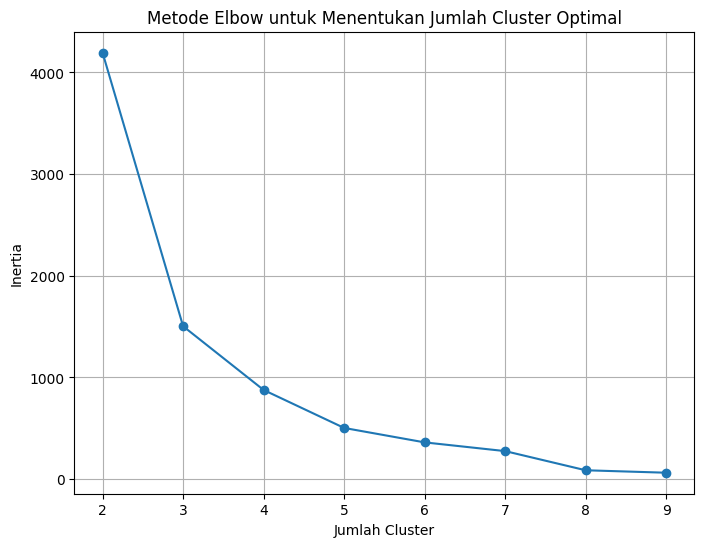

Jumlah cluster yang optimal berdasarkan metode Elbow adalah: 8


KMeans(n_clusters=np.int64(8), random_state=42)

In [181]:
# Pilih fitur yang relevan untuk clustering
X = df[['coffee_name', 'cash_type']]

# Metode Elbow: Mencari jumlah cluster yang optimal
inertia = []
k_range = range(2, 10)  # Menguji 2 hingga 10 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Menyimpan inertia untuk setiap k

# Plot hasil Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Mencari perubahan terbesar dalam inertia untuk menentukan jumlah cluster optimal
diff_inertia = np.diff(inertia)  # Menghitung perubahan inertia
optimal_k = np.argmax(diff_inertia) + 2  # Menambahkan 2 karena np.diff menghasilkan array yang lebih pendek

# Mencetak jumlah cluster optimal berdasarkan perubahan inertia
print(f"Jumlah cluster yang optimal berdasarkan metode Elbow adalah: {optimal_k}")

# Latih model KMeans dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)  # Latih model KMeans tanpa menambahkannya ke DataFrame



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [182]:
# Menghitung Silhouette Score untuk mengevaluasi hasil clustering
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Mencetak Silhouette Score
print(f"Silhouette Score untuk jumlah cluster {optimal_k} adalah: {silhouette_avg}")


Silhouette Score untuk jumlah cluster 8 adalah: 0.9547948942268498


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [183]:
# Terapkan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Latih model KMeans dengan jumlah cluster yang optimal pada data PCA
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Tampilkan hasil clustering (tanpa menyimpan ke dataframe)
print("Hasil clustering menggunakan PCA:")
print(kmeans_labels)

# Hitung Silhouette Score untuk mengevaluasi model clustering
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score untuk jumlah cluster {optimal_k} setelah PCA adalah: {silhouette_avg}")


Hasil clustering menggunakan PCA:
[1 5 5 ... 3 6 4]
Silhouette Score untuk jumlah cluster 8 setelah PCA adalah: 0.9547948942268498


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

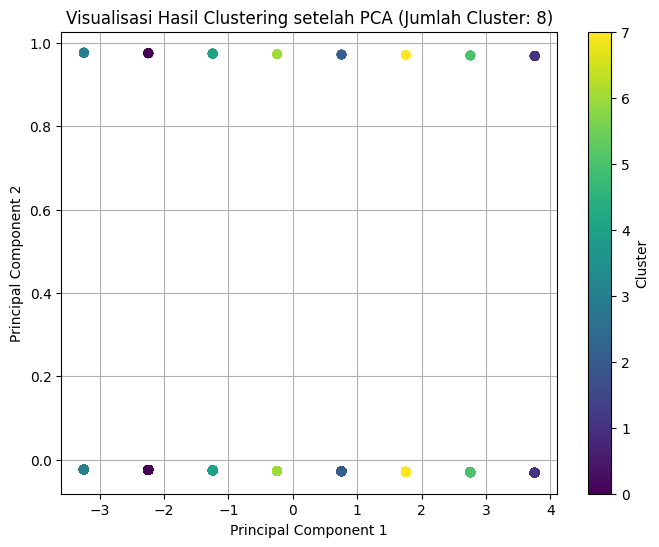

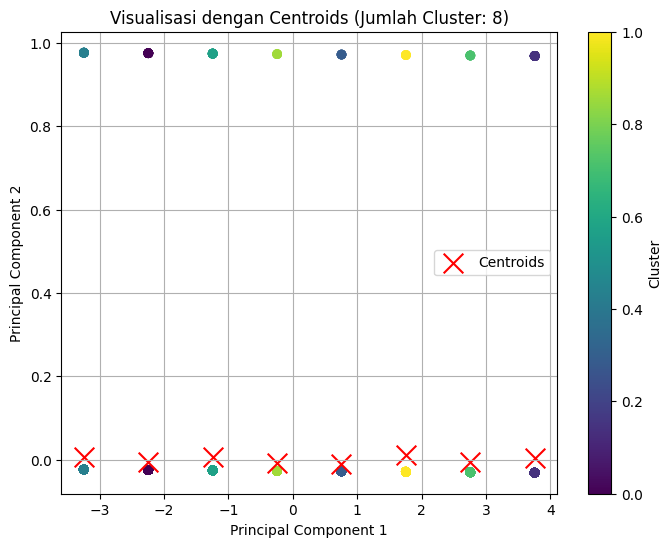

In [184]:
# Visualisasi Hasil Clustering dalam 2D setelah PCA
plt.figure(figsize=(8, 6))

# Gunakan warna berbeda untuk setiap cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')

# Tambahkan judul dan label
plt.title(f'Visualisasi Hasil Clustering setelah PCA (Jumlah Cluster: {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Tampilkan legenda untuk cluster
plt.colorbar(label='Cluster')

# Tampilkan plot
plt.show()

# Jika ingin menampilkan lebih detail, kita juga bisa menambahkan centroids untuk setiap cluster
centroids = kmeans.cluster_centers_

# Visualisasi centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'Visualisasi dengan Centroids (Jumlah Cluster: {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [185]:
# Menambahkan hasil clustering PCA ke DataFrame yang ada
df['cluster_pca'] = kmeans_labels  # Menambahkan kolom cluster_pca ke df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3263 non-null   datetime64[ns]
 1   datetime     3263 non-null   datetime64[ns]
 2   cash_type    3263 non-null   int64         
 3   card         3263 non-null   int64         
 4   money        3263 non-null   float64       
 5   coffee_name  3263 non-null   int64         
 6   year         3263 non-null   int32         
 7   month        3263 non-null   int32         
 8   cluster_pca  3263 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(3)
memory usage: 191.3 KB


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [186]:
# 4. Lakukan Inverse Transform pada Kolom Kategorikal
df['coffee_name'] = encoder_coffee.inverse_transform(df['coffee_name'])
df['card'] = encoder_card.inverse_transform(df['card'])
# Jika cash_type memiliki lebih dari satu kategori
if df['cash_type'].nunique() > 1:
    df['cash_type'] = encoder_cash.inverse_transform(df['cash_type'])

# Tampilkan hasil inverse transformasi
print(df.head())


        date                datetime cash_type                 card     money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  anon-0000-0000-0001  1.397345   
1 2024-03-01 2024-03-01 12:19:22.539      card  anon-0000-0000-0002  1.397345   
2 2024-03-01 2024-03-01 12:20:18.089      card  anon-0000-0000-0002  1.397345   
3 2024-03-01 2024-03-01 13:46:33.006      card  anon-0000-0000-0003 -0.586911   
4 2024-03-01 2024-03-01 13:48:14.626      card  anon-0000-0000-0004  1.397345   

     coffee_name  year  month  cluster_pca  
0          latte  2024      3            1  
1  hot chocolate  2024      3            5  
2  hot chocolate  2024      3            5  
3      americano  2024      3            3  
4          latte  2024      3            1  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [187]:
# Analisis frekuensi masing-masing kategori dalam setiap cluster
coffee_freq_per_cluster = df.groupby('cluster_pca')['coffee_name'].value_counts()
cash_freq_per_cluster = df.groupby('cluster_pca')['cash_type'].value_counts()

# Menampilkan hasil analisis
print("Frekuensi coffee_name per cluster:")
print(coffee_freq_per_cluster)

print("\nFrekuensi cash_type per cluster:")
print(cash_freq_per_cluster)


Frekuensi coffee_name per cluster:
cluster_pca  coffee_name        
0            americano with milk    764
1            latte                  714
2            cortado                289
3            americano              459
4            cappuccino             452
5            hot chocolate          256
6            cocoa                  207
7            espresso               122
Name: count, dtype: int64

Frekuensi cash_type per cluster:
cluster_pca  cash_type
0            card         749
             cash          15
1            card         689
             cash          25
2            card         284
             cash           5
3            card         445
             cash          14
4            card         437
             cash          15
5            card         250
             cash           6
6            card         203
             cash           4
7            card         117
             cash           5
Name: count, dtype: int64


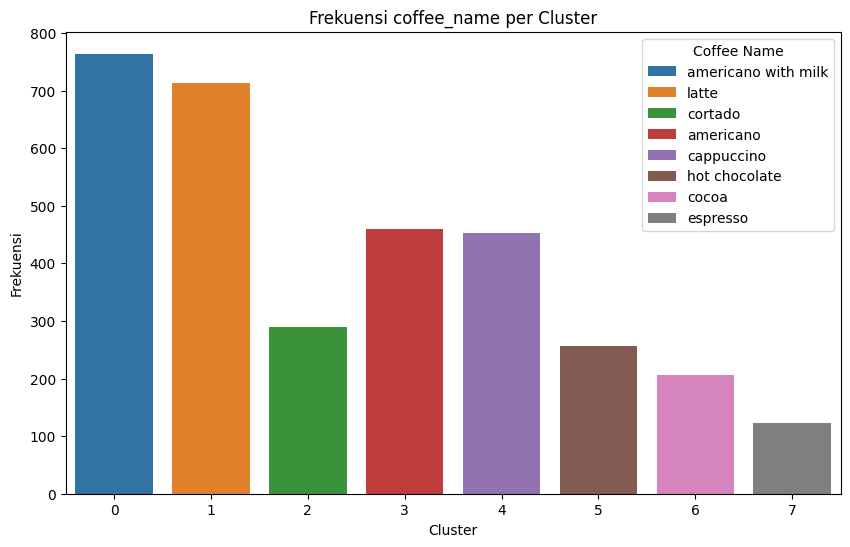

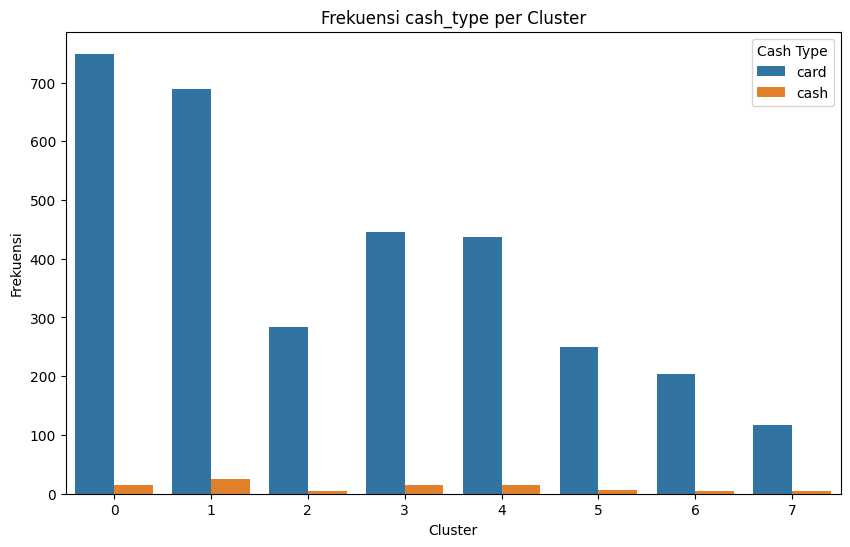

In [189]:
# Visualisasi frekuensi coffee_name per cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster_pca', hue='coffee_name')
plt.title('Frekuensi coffee_name per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frekuensi')
plt.legend(title='Coffee Name')
plt.show()

# Visualisasi frekuensi cash_type per cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster_pca', hue='cash_type')
plt.title('Frekuensi cash_type per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frekuensi')
plt.legend(title='Cash Type')
plt.show()


# Interpretasi Hasil Clustering Berdasarkan Jenis Kopi dan Metode Pembayaran

Berdasarkan hasil frekuensi untuk setiap cluster, berikut adalah interpretasi karakteristik dari masing-masing cluster berdasarkan jenis kopi (`coffee_name`) dan metode pembayaran (`cash_type`):

## Cluster 0:
- **Kopi Terpopuler**: "Americano with Milk" (764 kali).
- **Tipe Pembayaran**: Mayoritas transaksi dilakukan dengan kartu (`card`), dengan 749 transaksi, sedangkan hanya ada 15 transaksi yang menggunakan uang tunai (`cash`).

**Interpretasi**:
Cluster ini berisi pelanggan yang sangat menyukai kopi jenis "Americano with Milk". Semua transaksi hampir seluruhnya dilakukan menggunakan kartu, yang menunjukkan bahwa pelanggan di cluster ini lebih cenderung menggunakan metode pembayaran digital atau non-tunai.

---

## Cluster 1:
- **Kopi Terpopuler**: "Latte" (714 kali).
- **Tipe Pembayaran**: Mayoritas transaksi dilakukan dengan kartu (`card`), dengan 689 transaksi, dan hanya ada 25 transaksi yang menggunakan uang tunai (`cash`).

**Interpretasi**:
Cluster ini terdiri dari pelanggan yang sangat menyukai kopi jenis "Latte". Meskipun sebagian besar transaksi dilakukan dengan kartu, masih ada beberapa transaksi dengan uang tunai. Hal ini menunjukkan bahwa pelanggan di cluster ini lebih fleksibel dalam memilih metode pembayaran.

---

## Cluster 2:
- **Kopi Terpopuler**: "Cortado" (289 kali).
- **Tipe Pembayaran**: Mayoritas transaksi dilakukan dengan kartu (`card`), dengan 284 transaksi, sementara hanya ada 5 transaksi dengan uang tunai (`cash`).

**Interpretasi**:
Pelanggan di cluster ini lebih memilih kopi jenis "Cortado" dan lebih memilih pembayaran menggunakan kartu. Meskipun ada beberapa transaksi dengan uang tunai, pembayaran dengan kartu tetap mendominasi, menunjukkan preferensi terhadap transaksi non-tunai.

---

## Cluster 3:
- **Kopi Terpopuler**: "Americano" (459 kali).
- **Tipe Pembayaran**: Pembayaran dengan kartu lebih dominan, dengan 445 transaksi menggunakan kartu dan 14 transaksi menggunakan uang tunai (`cash`).

**Interpretasi**:
Cluster ini terdiri dari pelanggan yang menyukai kopi jenis "Americano". Pembayaran dengan kartu lebih dominan, namun ada sejumlah kecil transaksi yang dilakukan dengan uang tunai. Ini menunjukkan bahwa pelanggan di cluster ini lebih memilih menggunakan kartu sebagai metode pembayaran, meskipun beberapa masih memilih uang tunai.

---

## Cluster 4:
- **Kopi Terpopuler**: "Cappuccino" (452 kali).
- **Tipe Pembayaran**: Pembayaran lebih banyak dilakukan dengan kartu (`card`), dengan 437 transaksi, dan 15 transaksi menggunakan uang tunai (`cash`).

**Interpretasi**:
Cluster ini terdiri dari pelanggan yang lebih memilih kopi jenis "Cappuccino". Pembayaran dengan kartu lebih dominan, namun terdapat beberapa transaksi menggunakan uang tunai. Hal ini menunjukkan bahwa pelanggan di cluster ini sebagian besar menggunakan metode pembayaran digital, meskipun masih ada beberapa yang memilih uang tunai.

---

## Cluster 5:
- **Kopi Terpopuler**: "Hot Chocolate" (256 kali).
- **Tipe Pembayaran**: Pembayaran lebih banyak dilakukan dengan kartu (`card`), dengan 250 transaksi menggunakan kartu, dan hanya 6 transaksi menggunakan uang tunai (`cash`).

**Interpretasi**:
Cluster ini terdiri dari pelanggan yang lebih memilih kopi jenis "Hot Chocolate". Pembayaran dengan kartu lebih dominan, namun terdapat beberapa transaksi menggunakan uang tunai. Hal ini menunjukkan bahwa pelanggan di cluster ini sebagian besar menggunakan pembayaran digital.

---

## Cluster 6:
- **Kopi Terpopuler**: "Cocoa" (207 kali).
- **Tipe Pembayaran**: Mayoritas transaksi dilakukan dengan kartu (`card`), dengan 203 transaksi menggunakan kartu, dan hanya ada 4 transaksi dengan uang tunai (`cash`).

**Interpretasi**:
Pelanggan di cluster ini lebih suka minuman jenis "Cocoa" dan mayoritas transaksi dilakukan dengan kartu. Ini menunjukkan bahwa pelanggan di cluster ini lebih memilih pembayaran non-tunai.

---

## Cluster 7:
- **Kopi Terpopuler**: "Espresso" (122 kali).
- **Tipe Pembayaran**: Pembayaran dilakukan dengan kartu lebih banyak daripada uang tunai, dengan 117 transaksi menggunakan kartu dan 5 transaksi menggunakan uang tunai (`cash`).

**Interpretasi**:
Pelanggan di cluster ini lebih suka kopi jenis "Espresso", yang menunjukkan preferensi untuk kopi hitam yang lebih kuat. Pembayaran dengan kartu lebih dominan, namun ada beberapa transaksi menggunakan uang tunai. Hal ini mencerminkan pelanggan yang lebih memilih transaksi praktis melalui kartu.

---

## Kesimpulan
Berdasarkan analisis karakteristik setiap cluster:
- Cluster 0 memiliki pelanggan yang sangat menyukai "Americano with Milk" dan hampir seluruh transaksi menggunakan kartu.
- Cluster 1 memiliki pelanggan yang menyukai "Latte" dan mayoritas transaksi dilakukan dengan kartu, tetapi ada beberapa transaksi dengan uang tunai.
- Cluster 2 berisi pelanggan yang lebih suka "Cortado" dengan pembayaran yang lebih dominan menggunakan kartu.
- Cluster 3 memiliki pelanggan yang menyukai "Americano", dengan pembayaran lebih dominan menggunakan kartu.
- Cluster 4 berisi pelanggan yang menyukai "Cappuccino" dan lebih banyak melakukan pembayaran menggunakan kartu.
- Cluster 5 lebih banyak berisi pelanggan yang memilih "Hot Chocolate" dan melakukan pembayaran menggunakan kartu.
- Cluster 6 memiliki pelanggan yang lebih suka "Cocoa" dan lebih memilih pembayaran non-tunai.
- Cluster 7 berisi pelanggan yang lebih suka "Espresso" dan lebih memilih pembayaran dengan kartu.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [190]:
# Menyimpan hasil dataframe setelah inverse transformasi ke dalam file CSV
df_cluster = df.copy()
df_cluster.to_csv('coffee_sales_klasifikasi.csv', index=False)

# Memberikan pesan bahwa file telah disimpan
print("File setelah inverse transformasi telah disimpan dengan nama 'coffee_sales_klasifikasi.csv'.")

File setelah inverse transformasi telah disimpan dengan nama 'coffee_sales_klasifikasi.csv'.
